Enter the function f(x) (use 'np' for numpy functions, e.g., np.arctan):
 0.65 - (0.75/(1+x**2)) - 0.65*x*np.arctan(1/x)
Enter initial guess (x):  0.1
Enter step size (delta(x)):  0.01
Enter convergence criterion (epsilon):  0.01
Enter maximum number of iterations:  5


Iteration 1: x1 = 0.10000, f(x1+) = -0.195512, f(x1) = -0.188198, f(x1-) = -0.180615, f'(x1) = -0.744869
Iteration 2: x2 = 0.37727, f(x2+) = -0.304587, f(x2) = -0.303283, f(x2-) = -0.301822, f'(x2) = -0.138261
Iteration 3: x3 = 0.46518, f(x3+) = -0.310003, f(x3) = -0.309882, f(x3-) = -0.309644, f'(x3) = -0.017912
Iteration 4: x4 = 0.48047, f(x4+) = -0.309970, f(x4) = -0.310020, f(x4-) = -0.309960, f'(x4) = -0.000503
Iteration 5: x5 = 0.48093, f(x5+) = -0.309965, f(x5) = -0.310020, f(x5-) = -0.309965, f'(x5) = -0.000000


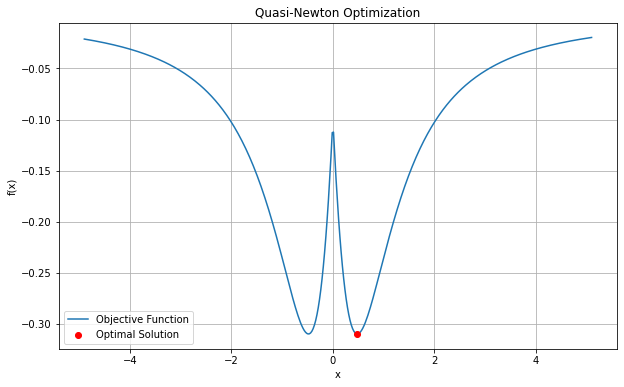

Optimal solution found at x = 0.48093, f(x) = -0.31002


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Get user inputs
function_input = input("Enter the function f(x) (use 'np' for numpy functions, e.g., np.arctan):\n")
initial_guess = float(input("Enter initial guess (x): "))
delta = float(input("Enter step size (delta(x)): "))
epsilon = float(input("Enter convergence criterion (epsilon): "))
max_iterations = int(input("Enter maximum number of iterations: "))

# Define the objective function from user input
f_raw = eval("lambda x: " + function_input)

# Make f able to handle arrays and scalars
f = np.vectorize(f_raw)

# Define the first and second derivatives using finite differences
def first_derivative(f, x, delta):
    return (f(x + delta) - f(x - delta)) / (2 * delta)

def second_derivative(f, x, delta):
    return (f(x + delta) - 2 * f(x) + f(x - delta)) / (delta**2)

def quasi_newton(f, initial_guess, epsilon, max_iterations, delta=0.01):
    x_i = initial_guess
    iteration = 0
    
    while True:
        f_plus = f(x_i + delta)
        f_minus = f(x_i - delta)
        f_current = f(x_i)
        
        numerator = f_plus - f_minus
        denominator = 2 * (f_plus - 2 * f_current + f_minus)
        
        if denominator == 0:
            print("Denominator is zero. Stopping iteration to avoid division by zero.")
            break
        
        x_i_plus = x_i - delta * numerator / denominator
        f_prime_x_i = numerator / (2 * delta)
        
        print(f"Iteration {iteration + 1}: x{iteration + 1} = {x_i:.5f}, "
              f"f(x{iteration + 1}+) = {f_plus:.6f}, f(x{iteration + 1}) = {f_current:.6f}, "
              f"f(x{iteration + 1}-) = {f_minus:.6f}, f'(x{iteration + 1}) = {f_prime_x_i:.6f}")
        
        if abs(numerator) / abs(denominator) < epsilon or iteration >= max_iterations:
            break
        
        x_i = x_i_plus
        iteration += 1
    
    return x_i_plus

# Perform Quasi-Newton optimization
optimal_solution = quasi_newton(f, initial_guess, epsilon, max_iterations, delta=delta)

# Plot the function
x_values = np.linspace(initial_guess - 5, initial_guess + 5, 400)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Objective Function')
plt.scatter(optimal_solution, f(optimal_solution), color='red', label='Optimal Solution', zorder=5)
plt.title('Quasi-Newton Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal solution found at x = {optimal_solution:.5f}, f(x) = {f(optimal_solution):.5f}")

